In [ ]:
# 1: RUN AT EVERY NEW RUNTIME
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

# Install fvcore
!pip install -U fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61397 sha256=31e6f302439422fddffccdd2875ff915e6338ff394e85e76635f33a1ee4f6731
  Stored in directory: /root/.cache/pip/wheels/65/71/95/3b8fde5c65c6e4a806e0867c1651dcc71a1cb2f3430e8f355f
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=c4a7dbc52c949a8eb42fba802406b37399a5f4edaa4fa3d58f9af02c882654c4
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built fvcore iopath


In [ ]:
# 2: NEED TO RUN AT AVERY NEW RUNTIME
# Setup google drive connection
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import gspread
from google.auth import default
from google.colab import auth

# Autenticazione
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [ ]:
# TO BE RUNNED JUST THE FIRST TIME!
# Setup git integration
#%cd /content/drive/MyDrive
#!git clone https://github.com/s348174/MLDL2024_project1.git
#%cd

UsageError: Line magic function `%#cd` not found.


In [ ]:
# 3. RUN EVERYTIME IN ORDER TO AVOID CONFLICTS
# Update drive git directory
%cd /content/drive/MyDrive/MLDL2024_project1
!git pull
%cd


/content/drive/MyDrive/MLDL2024_project1
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 7), reused 6 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (11/11), 4.47 KiB | 3.00 KiB/s, done.
From https://github.com/s348174/MLDL2024_project1
   74fc115..2ad4e84  master     -> origin/master
Updating 74fc115..2ad4e84
Fast-forward
 Progetto ML25.ipynb | 199 ++++++++++++++++++++++++++++++++++++++++++----------
 train.py            | 174 ++++++++++++++++++++++++++++++++-------------
 2 files changed, 286 insertions(+), 87 deletions(-)
/root


In [ ]:
# 4. RUN TO REMOUNT DRIVE AND APPLY CHANGES
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# 5A. RUN THIS CELL TO TRAIN DEEPLAB ON CITYSCAPES
import sys
import os
from tempfile import TemporaryDirectory

# Add the directory containing train.py to the system path
google_drive_path = '/content/drive/MyDrive/MLDL2024_project1'
sys.path.append(google_drive_path)
datasets_folder_path = '/content/drive/MyDrive/MLDL2024_project1/datasets'
sys.path.append(datasets_folder_path)
models_path = '/content/drive/MyDrive/MLDL2024_project1/models/deeplabv2'
sys.path.append(models_path)
from train import deeplab_train, deeplab_test

# Open zipfile
import zipfile
zip_path = '/content/drive/MyDrive/machine_learning_shared_2025/Cityscapes.zip'
workspace_path = google_drive_path
with zipfile.ZipFile(zip_path) as z:
  # Mostra i file contenuti
  #print("Contenuto dello ZIP:", z.namelist())
  with TemporaryDirectory() as tmpdir:
    z.extractall(tmpdir)
    #image_folder_path=tmpdir+"/Cityscapes/Cityspaces/images/train"
    #train_data = datasets.ImageFolder(
    #    root=image_folder_path,
    #    transform=ToTensor()
    #)
    #test_folder_path=tmpdir+"/Cityscapes/Cityspaces/images/test"
    #test_data = datasets.ImageFolder(
    #    root=image_folder_path,
    #    transform=ToTensor()
    #)

    # Creates symlink to data folder
    real_path = "tmpdir"
    #destinazione_symlink = "/tmp/tmpcp08lfus"
    #if not os.path.exists(destinazione_symlink):
    #    os.symlink(real_path, destinazione_symlink)

    num_epochs = 50
    batch_size = 2
    dataset_path = tmpdir+"/Cityscapes/Cityspaces"
    pretrained_path = workspace_path + "/deeplab_resnet_pretrained_imagenet.pth"
    deeplab_train(dataset_path, workspace_path, pretrained_path, checkpoint=False, balanced=False, num_epochs=num_epochs, batch_size=batch_size)
    model_path = workspace_path + "/export/deeplabv2_final.pth"
    deeplab_test(dataset_path, model_path)

KeyboardInterrupt: 

In [ ]:
# 5B. RUN THIS CELL TO TRAIN BISENET ON CITYSCAPES
import sys
import os
from tempfile import TemporaryDirectory

# Add the directory containing train.py to the system path
google_drive_path = '/content/drive/MyDrive/MLDL2024_project1'
sys.path.append(google_drive_path)
datasets_folder_path = '/content/drive/MyDrive/MLDL2024_project1/datasets'
sys.path.append(datasets_folder_path)
models_path = '/content/drive/MyDrive/MLDL2024_project1/models/bisenet'
sys.path.append(models_path)
from train import bisenet_train, bisenet_test

# Open zipfile
import zipfile
zip_path = '/content/drive/MyDrive/machine_learning_shared_2025/Cityscapes.zip'
workspace_path = google_drive_path
with zipfile.ZipFile(zip_path) as z:
  # Mostra i file contenuti
  #print("Contenuto dello ZIP:", z.namelist())
  with TemporaryDirectory() as tmpdir:
    z.extractall(tmpdir)
    #image_folder_path=tmpdir+"/Cityscapes/Cityspaces/images/train"
    #train_data = datasets.ImageFolder(
    #    root=image_folder_path,
    #    transform=ToTensor()
    #)
    #test_folder_path=tmpdir+"/Cityscapes/Cityspaces/images/test"
    #test_data = datasets.ImageFolder(
    #    root=image_folder_path,
    #    transform=ToTensor()
    #)

    # Creates symlink to data folder
    real_path = "tmpdir"
    #destinazione_symlink = "/tmp/tmpcp08lfus"
    #if not os.path.exists(destinazione_symlink):
    #    os.symlink(real_path, destinazione_symlink)

    num_epochs = 50
    batch_size = 2
    dataset_path = tmpdir+"/Cityscapes/Cityspaces"
    pretrained_path = workspace_path + "/deeplab_resnet_pretrained_imagenet.pth"
    bisenet_train(dataset_path, workspace_path, pretrained_path, checkpoint=False, balanced=False, num_epochs=num_epochs, batch_size=batch_size)
    model_path = workspace_path + "/export/bisenet_final.pth"
    bisenet_test(dataset_path, model_path)

Found 1572 images and 1572 labels
Image map: 1572
Matched 1572 image-label pairs


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 166MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 211MB/s]


BiSeNet pretrain loading...
Starting training from scratch with pretrained weights
Moving model to device...
BiSeNet model saved at epoch 0
BiSeNet model saved at epoch 5
BiSeNet model saved at epoch 10
BiSeNet model saved at epoch 15
BiSeNet model saved at epoch 20
BiSeNet model saved at epoch 25
BiSeNet model saved at epoch 30
BiSeNet model saved at epoch 35
BiSeNet model saved at epoch 40
BiSeNet model saved at epoch 45
BiSeNet model saved as bisenet_final.pth
Found 500 images and 500 labels
Image map: 500
Matched 500 image-label pairs
Running BiSeNet inference...
Iteration 0/500, Latency: 0.1853s, FPS: 5.40
Iteration 10/500, Latency: 0.0055s, FPS: 180.23
Iteration 20/500, Latency: 0.0056s, FPS: 179.09
Iteration 30/500, Latency: 0.0054s, FPS: 185.46
Iteration 40/500, Latency: 0.0057s, FPS: 176.77
Iteration 50/500, Latency: 0.0067s, FPS: 148.92
Iteration 60/500, Latency: 0.0054s, FPS: 184.24
Iteration 70/500, Latency: 0.0060s, FPS: 167.53
Iteration 80/500, Latency: 0.0053s, FPS: 189.

Found 2500 images and 2500 labels
Matched 2500 image-label pairs
Class names: ['road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle']
Number of classes: 19
Number of training samples: 2500
Number of labels: 2500


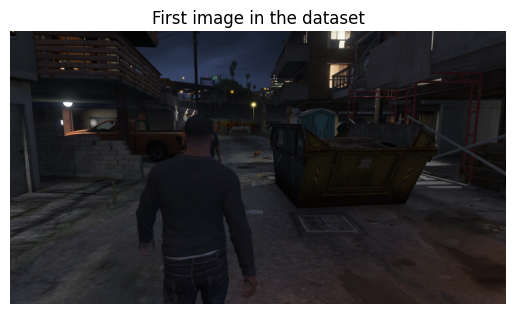

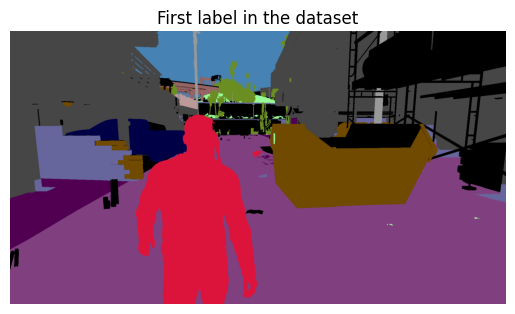

TypeError: Input type int64 is not supported

In [ ]:
# 6B. RUN THIS CELL TO TRAIN BISENET ON GTA5
import sys
import os
from tempfile import TemporaryDirectory

# Add the directory containing train.py to the system path
google_drive_path = '/content/drive/MyDrive/MLDL2024_project1'
sys.path.append(google_drive_path)
datasets_folder_path = '/content/drive/MyDrive/MLDL2024_project1/datasets'
sys.path.append(datasets_folder_path)
models_path = '/content/drive/MyDrive/MLDL2024_project1/models/bisenet'
sys.path.append(models_path)
from train import bisenet_on_gta

# Open zipfile
import zipfile
zip_path = '/content/drive/MyDrive/machine_learning_shared_2025/GTA5.zip'
workspace_path = google_drive_path
with zipfile.ZipFile(zip_path) as z:
  # Mostra i file contenuti
  #print("Contenuto dello ZIP:", z.namelist())
  with TemporaryDirectory() as tmpdir:
    z.extractall(tmpdir)
    #image_folder_path=tmpdir+"/Cityscapes/Cityspaces/images/train"
    #train_data = datasets.ImageFolder(
    #    root=image_folder_path,
    #    transform=ToTensor()
    #)
    #test_folder_path=tmpdir+"/Cityscapes/Cityspaces/images/test"
    #test_data = datasets.ImageFolder(
    #    root=image_folder_path,
    #    transform=ToTensor()
    #)

    # Creates symlink to data folder
    real_path = "tmpdir"
    #destinazione_symlink = "/tmp/tmpcp08lfus"
    #if not os.path.exists(destinazione_symlink):
    #    os.symlink(real_path, destinazione_symlink)

    num_epochs = 50
    batch_size = 2
    dataset_path = tmpdir+"/GTA5"
    pretrained_path = workspace_path + "/deeplab_resnet_pretrained_imagenet.pth"
    bisenet_on_gta(dataset_path, workspace_path, pretrained_path, checkpoint=False, balanced=False, num_epochs=num_epochs, batch_size=batch_size)

In [ ]:
#to check core availability
import multiprocessing
max_num_workers = multiprocessing.cpu_count() #colab pro has 4 (the default has just 2) (for Emanuele)
print(f"Number of CPU cores: {max_num_workers}") #when Emanuele runs the code, it prints 8

Number of CPU cores: 12
